# Selección features

## Carga de librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
pd.option_context('mode.use_inf_as_na', True)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

import joblib
import os


from EDA_function_tools import *
from toolbox_DS import *

## Carga de datos

In [2]:
df = pd.read_csv('./data/df_final_precios_ordenadores.csv', index_col = 0)
df.head(8)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution_disc,Pantalla_disc,Family_disc,Clock_speed_disc,Modelo_procesador_disc,Gpu Type,Gpu_Brand_disc,GPU_model_disc,storage_type_disc,Componentes_principales
id,,,,,,,,,,,,,,,,,
268,Dell,Notebook,15.6,8,Windows 10,2.36,749.00,0,1,3,4,4,Dedicated,0,2,1,2.995732
347,Asus,Notebook,15.6,4,Windows 10,2.00,449.00,0,1,0,0,0,Unknown,1,0,1,1.791759
353,Toshiba,Notebook,13.3,8,Windows 7,1.20,1460.00,3,1,2,3,3,Unknown,1,2,3,2.995732
578,Dell,Gaming,15.6,16,Windows 10,4.42,2868.99,9,4,3,6,6,Dedicated,2,10,3,3.737670
42,Dell,Ultrabook,12.5,8,Windows 7,1.26,1713.37,3,1,2,1,4,Unknown,1,2,3,2.944439
867,Asus,2 in 1 Convertible,15.6,12,Windows 10,2.26,1099.00,3,1,3,4,4,Dedicated,2,3,3,3.295837
1136,Asus,Notebook,15.6,4,Linux,2.00,415.00,3,1,1,0,0,Unknown,1,2,3,2.302585
609,MSI,Gaming,15.6,8,Windows 10,2.40,1142.80,3,1,3,6,6,Dedicated,2,3,3,3.295837


In [19]:
# Features visuales del EDA anterior copiadas a mano...
features_visual = [
 'Weight',
  'Resolution_disc',
 'Pantalla_disc',
 'Family_disc',
 'Clock_speed_disc',
 'Modelo_procesador_disc',
 'Gpu_Brand_disc',
 'GPU_model_disc',
 'storage_type_disc',
 'Componentes_principales']

### Selección de features con ML

Parto de todas las features, convirtiendo las categóricas a numéricas

In [4]:
features_cat = df.select_dtypes(include=('object')).columns.tolist()
features_cat

['Company', 'TypeName', 'OpSys', 'Gpu Type']

Tratamiento de features para todas las variables categóricas

In [5]:
df_engin = pd.get_dummies(df,columns=features_cat, dtype=int)
df_engin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 268 to 1179
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       912 non-null    float64
 1   Ram                          912 non-null    int64  
 2   Weight                       912 non-null    float64
 3   Price_euros                  912 non-null    float64
 4   Resolution_disc              912 non-null    int64  
 5   Pantalla_disc                912 non-null    int64  
 6   Family_disc                  912 non-null    int64  
 7   Clock_speed_disc             912 non-null    int64  
 8   Modelo_procesador_disc       912 non-null    int64  
 9   Gpu_Brand_disc               912 non-null    int64  
 10  GPU_model_disc               912 non-null    int64  
 11  storage_type_disc            912 non-null    int64  
 12  Componentes_principales      912 non-null    float64
 13  Company_Acer          

In [6]:
df_engin.columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'Resolution_disc',
       'Pantalla_disc', 'Family_disc', 'Clock_speed_disc',
       'Modelo_procesador_disc', 'Gpu_Brand_disc', 'GPU_model_disc',
       'storage_type_disc', 'Componentes_principales', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Gpu Type_Dedicated',
       'Gpu Type_Unknown'],
    

In [7]:
X_train_engin = df_engin.drop(columns='Price_euros')
y_train_engin = df['Price_euros']
print('X_train_engin', X_train_engin.shape)
print('y_train',y_train_engin.shape)

X_train_engin (912, 48)
y_train (912,)


In [8]:
X_train_engin.columns

Index(['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'Gpu_Brand_disc', 'GPU_model_disc', 'storage_type_disc',
       'Componentes_principales', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Gpu Type_Dedicated',
       'Gpu Type_Unknown'],
      dtype='object

#### Selección de features numéricas mediante SelectKBeest y Anova

In [9]:
selector =SelectKBest(f_regression, k =15)

x_data_kbest = selector.fit_transform(X_train_engin, y_train_engin)

X_train_kBest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kBest.columns

Index(['Ram', 'Resolution_disc', 'Pantalla_disc', 'Family_disc',
       'Clock_speed_disc', 'Modelo_procesador_disc', 'Gpu_Brand_disc',
       'GPU_model_disc', 'storage_type_disc', 'Componentes_principales',
       'Company_Razer', 'TypeName_Gaming', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation'],
      dtype='object')

In [10]:
features_anova = X_train_kBest.columns

#### Selección usando modelo SelectFromModel

In [11]:
rf_selector = RandomForestRegressor(max_depth=5,random_state=42)
rf_selector.fit(X_train_engin, y_train_engin)

RandomForestRegressor(max_depth=5, random_state=42)

In [12]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.07343368, 0.06585403, 0.1341111 , 0.65782968])

In [13]:
# Instanciamos el modelo
selector_model = SelectFromModel(estimator=rf_selector,threshold= 'median')

# Entrenamos
selector_model.fit(X_train_engin,y_train_engin)

SelectFromModel(estimator=RandomForestRegressor(max_depth=5, random_state=42),
                threshold='median')

In [20]:
selector_model.get_feature_names_out()

array(['Inches', 'Ram', 'Weight', 'Resolution_disc', 'Pantalla_disc',
       'Family_disc', 'Clock_speed_disc', 'Modelo_procesador_disc',
       'GPU_model_disc', 'storage_type_disc', 'Componentes_principales',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_Razer', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Windows 10', 'OpSys_Windows 7', 'Gpu Type_Unknown'],
      dtype=object)

In [21]:
features_selector = selector_model.get_feature_names_out()

#### Selección usando RFE

In [22]:
# Instnacio modelo de clasificación
rf_RFE = RandomForestRegressor(max_depth=5,random_state=42)
# Sobre el modelo instancio el rfe
rfe = RFE(
    estimator=rf_RFE,
    n_features_to_select=15,
    step=1
)

# Entreno el modelo rfe
rfe.fit(X_train_engin,y_train_engin)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:15]

[ 1  6  1  1  1  1  1  1 15  1  1  1 14 16  5 25  2 26 29  1 28 17  7 13
 31 34  1 32 18 33 20 10  4 22  1  8  1 23 21 19 24 11  9 30  1 27  3 12]


,ranking
Inches,1
Company_HP,1
TypeName_Notebook,1
TypeName_Workstation,1
Componentes_principales,1
storage_type_disc,1
GPU_model_disc,1
OpSys_Windows 7,1
Company_Razer,1
Clock_speed_disc,1


In [17]:
temp = pd.DataFrame(rfe.ranking_,columns=['ranking'], index=X_train_engin.columns).sort_values('ranking')[:15]
temp.index[:15]
features_rfe = temp.index[:15]

#### Selección por SFS

In [18]:
# Instancio modelo clasificación
rf_sfs = RandomForestRegressor(max_depth=5,random_state=42)
# Instancio el modelo de la features selection
sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=15,
    cv = 4,
    scoring='neg_mean_absolute_error' 
)

# Entreno el modelo de features_selection
sfs_fordward.fit(X_train_engin,y_train_engin)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestRegressor(max_depth=5,
                                                          random_state=42),
                          n_features_to_select=15,
                          scoring='neg_mean_absolute_error')

In [23]:
# printar las features seleccionadas
print("Elegidasd SFS:", sfs_fordward.get_feature_names_out())

Elegidasd SFS: ['Inches' 'Ram' 'Weight' 'Resolution_disc' 'Pantalla_disc' 'Family_disc'
 'GPU_model_disc' 'storage_type_disc' 'Componentes_principales'
 'Company_Asus' 'Company_Dell' 'Company_Toshiba' 'TypeName_Gaming'
 'TypeName_Workstation' 'OpSys_macOS']


In [24]:
features_sfs = sfs_fordward.get_feature_names_out()

#### Seleccion por Hard Voting

In [25]:
listas_features = [features_visual, features_anova, features_selector,features_rfe,features_sfs]
dicc_hard_voting = {}

for col in df.columns:
    count = 0
    for lista in listas_features:
        if col in lista:
            count +=1
    dicc_hard_voting[col]=count
pprint(dicc_hard_voting)

{'Clock_speed_disc': 4,
 'Company': 0,
 'Componentes_principales': 5,
 'Family_disc': 5,
 'GPU_model_disc': 5,
 'Gpu Type': 0,
 'Gpu_Brand_disc': 2,
 'Inches': 3,
 'Modelo_procesador_disc': 4,
 'OpSys': 0,
 'Pantalla_disc': 5,
 'Price_euros': 0,
 'Ram': 3,
 'Resolution_disc': 5,
 'TypeName': 0,
 'Weight': 4,
 'storage_type_disc': 5}


In [26]:
features_hard_voting = []

for i,j in dicc_hard_voting.items():
    if j == 5 or j == 4:
        features_hard_voting.append(i)
features_hard_voting

['Weight',
 'Resolution_disc',
 'Pantalla_disc',
 'Family_disc',
 'Clock_speed_disc',
 'Modelo_procesador_disc',
 'GPU_model_disc',
 'storage_type_disc',
 'Componentes_principales']

#### Prueba mejores modelos con cross_val_score

Instancio modelos

In [27]:
lin_reg = LinearRegression()
rf_model = RandomForestRegressor(max_depth=5, random_state=42)
gb= GradientBoostingRegressor(max_depth=5, random_state=42)
xgb = XGBRFRegressor(max_depth = 5, random_state = 42)
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42,verbose=0)

In [28]:
# Lista de features
features_list = [features_visual,features_anova, features_selector,features_rfe,features_sfs,features_hard_voting]
features_list_name = ['Visual','ANNOVA', 'SelectFromModel','RFE','SFS','Hard_voting']

# Nombre de los modelos:
model_name = ['LinearRegression','RandomForestregression','GradientBoostingRegressor','XGBoostRegressor','CatBoostRegressor']

# Variables con modelos:
model_list = [lin_reg,rf_model,gb,xgb,cat]

for i,lista in enumerate(features_list):
    for j,modelo in enumerate(model_list):
        score = np.mean(cross_val_score(modelo, X_train_engin[lista], y_train_engin, cv = 5, scoring = 'neg_mean_absolute_error')).round(2)
        print(f'Lista: {features_list_name[i]} y modelo: {model_name[j]}: {score}')
    print()

Lista: Visual y modelo: LinearRegression: -244.96
Lista: Visual y modelo: RandomForestregression: -192.1
Lista: Visual y modelo: GradientBoostingRegressor: -179.44
Lista: Visual y modelo: XGBoostRegressor: -193.52
Lista: Visual y modelo: CatBoostRegressor: -184.54

Lista: ANNOVA y modelo: LinearRegression: -215.96
Lista: ANNOVA y modelo: RandomForestregression: -205.88
Lista: ANNOVA y modelo: GradientBoostingRegressor: -194.34
Lista: ANNOVA y modelo: XGBoostRegressor: -206.95
Lista: ANNOVA y modelo: CatBoostRegressor: -191.29

Lista: SelectFromModel y modelo: LinearRegression: -208.48
Lista: SelectFromModel y modelo: RandomForestregression: -191.81
Lista: SelectFromModel y modelo: GradientBoostingRegressor: -165.54
Lista: SelectFromModel y modelo: XGBoostRegressor: -193.91
Lista: SelectFromModel y modelo: CatBoostRegressor: -172.8

Lista: RFE y modelo: LinearRegression: -237.93
Lista: RFE y modelo: RandomForestregression: -192.26
Lista: RFE y modelo: GradientBoostingRegressor: -174.38


In [29]:
rf_model.fit(X_train_engin,y_train_engin)

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Features' : X_train_engin.columns,
    'Importance': feature_importance
})

feature_importance_df=feature_importance_df.sort_values('Importance',ascending=False)

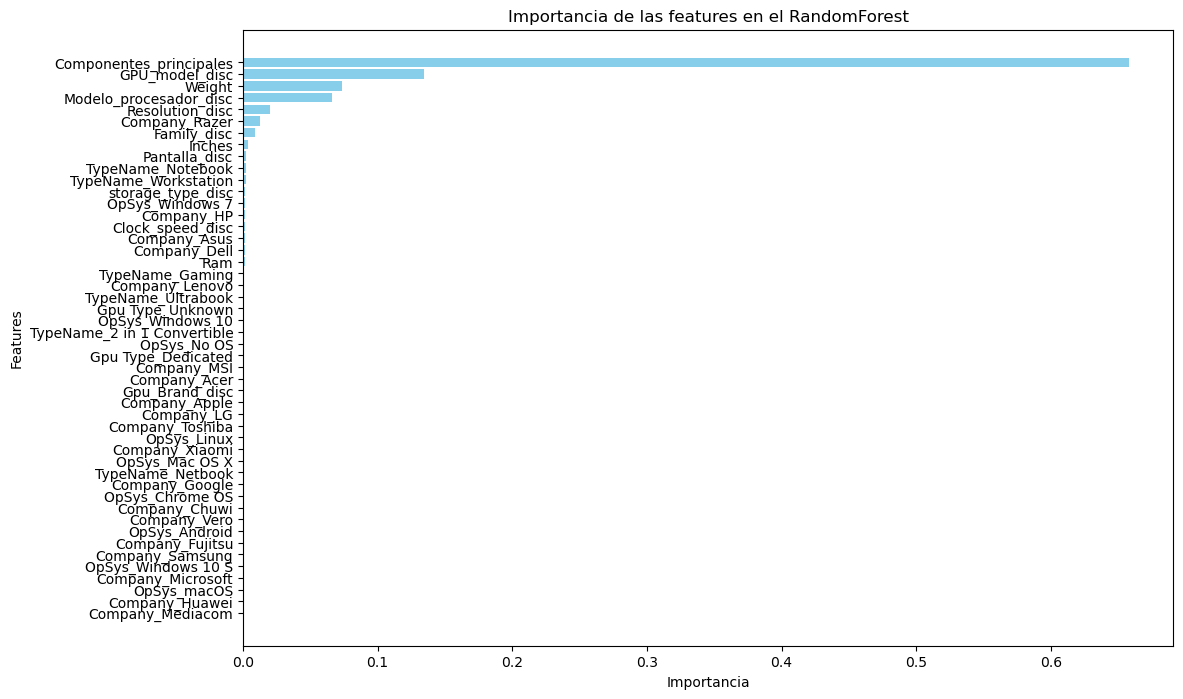

In [30]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de las features en el RandomForest')
plt.gca().invert_yaxis()
plt.show()

In [31]:
gb.fit(X_train_engin,y_train_engin)

feature_importance = gb.feature_importances_

feature_importance_df = pd.DataFrame({
    'Features' : X_train_engin.columns,
    'Importance': feature_importance
})

feature_importance_df=feature_importance_df.sort_values('Importance',ascending=False)

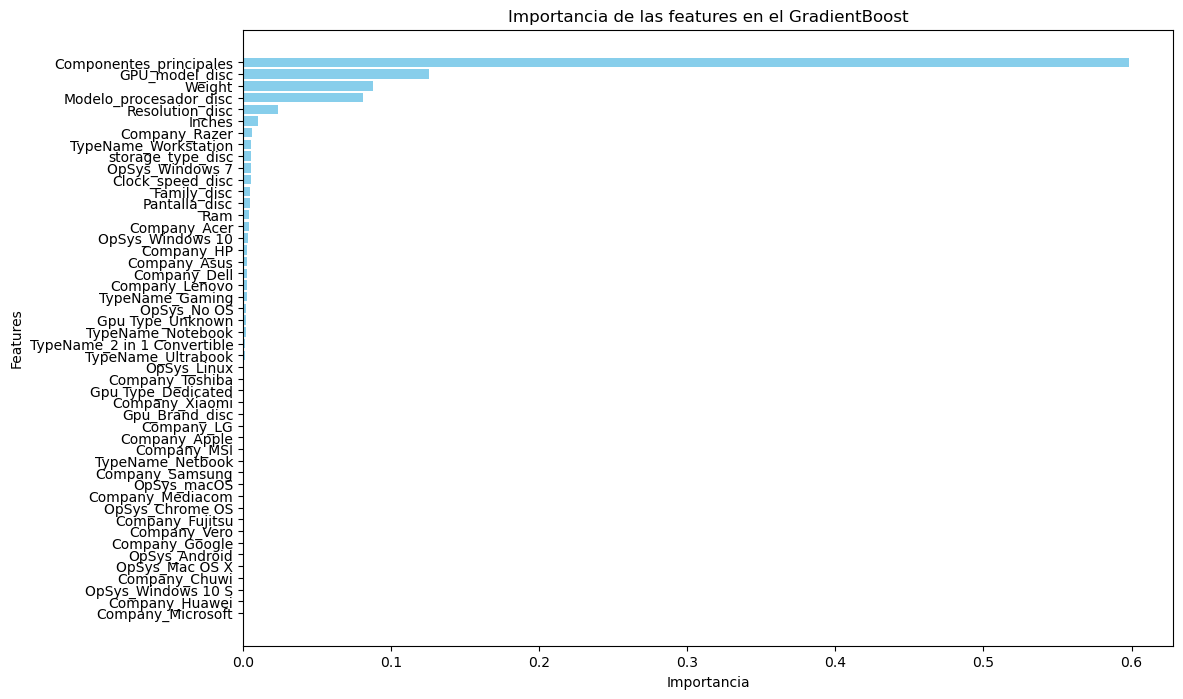

In [32]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de las features en el GradientBoost')
plt.gca().invert_yaxis()
plt.show()

### Optimización hiperparámetros


Voy a probar 3 modelos:
- GradientBoostingRegressos
- RandomForestRegressor
- XGBoostRegressor

#### Escalado de datos

In [33]:
features_scaled = df_engin.select_dtypes(include=(['int','float'])).columns.tolist()
features_scaled= features_scaled.remove('Price_euros')
print(features_scaled)
scaler = StandardScaler()

temp = scaler.fit_transform(df_engin[features_scaled])
df_scaled = df_engin.copy()
df_scaled[features_scaled] = temp
df_scaled

None


KeyError: None

Para GBR (escalado)

In [42]:
X_train_model = X_train_engin[features_selector]

param_grid_gb_reg = {
    'n_estimators': [250,290,300],
    'max_depth': [3,4,5],
    'learning_rate': [0.05,0.06,0.07],
    'subsample': [0.5,0.6,0.7]
    
}

gbr_grid_4 = GridSearchCV(estimator=gb,
                     param_grid=param_grid_gb_reg, 
                     scoring='neg_mean_absolute_error', 
                     cv=5, 
                     n_jobs=-1)

gbr_grid_4.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.06, 0.07],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [250, 290, 300],
                         'subsample': [0.5, 0.6, 0.7]},
             scoring='neg_mean_absolute_error')

In [43]:
best_model_gb_reg = gbr_grid_4.best_estimator_
best_params_gb_reg = gbr_grid_4.best_params_
best_score_gb_reg = gbr_grid_4.best_score_

print(f'Best Parameters for Regression: {best_params_gb_reg}')
print(f'Best Score for Regression: {best_score_gb_reg}')


Best Parameters for Regression: {'learning_rate': 0.06, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.6}
Best Score for Regression: -159.40000335962847


Para GradienBoot con lista features_sfs

In [50]:
X_train_model = df_scaled[features_sfs]

param_grid_gb_reg = {
    'n_estimators': [125,130,135],
    'max_depth': [6,7,8],
    'learning_rate': [0.08,0.09,0.1],
    'subsample': [0.3,0.4, 0.5]
    
}

gbr_grid_sfs = GridSearchCV(estimator=gb,
                     param_grid=param_grid_gb_reg, 
                     scoring='neg_mean_absolute_error', 
                     cv=5, 
                     n_jobs=-1)

gbr_grid_sfs.fit(X_train_model, y_train_engin)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.09, 0.1],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [125, 130, 135],
                         'subsample': [0.3, 0.4, 0.5]},
             scoring='neg_mean_absolute_error')

In [51]:
best_model_gb_reg = gbr_grid_sfs.best_estimator_
best_params_gb_reg = gbr_grid_sfs.best_params_
best_score_gb_reg = gbr_grid_sfs.best_score_

print(f'Best Parameters for Regression: {best_params_gb_reg}')
print(f'Best Score for Regression: {best_score_gb_reg}')

Best Parameters for Regression: {'learning_rate': 0.09, 'max_depth': 7, 'n_estimators': 135, 'subsample': 0.4}
Best Score for Regression: -163.84219573199795


In [44]:
import joblib
import os

model_path = os.path.join('models', 'gbr_grid_5.pkl')
joblib.dump(gbr_grid_4, model_path)

['models\\gbr_grid_5.pkl']

In [57]:
model_path = os.path.join('models', 'gbr_grid_sfs.pkl')
joblib.dump(gbr_grid_sfs, model_path)

['models\\gbr_grid_sfs.pkl']